In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

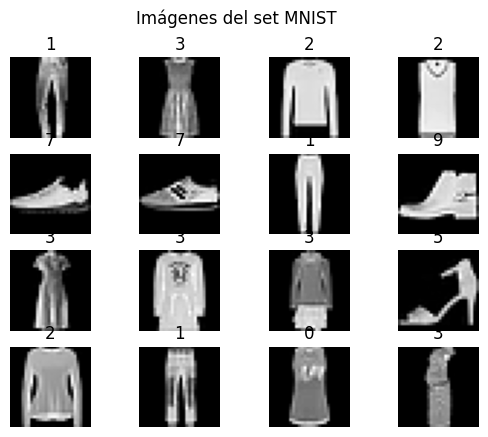

In [3]:
ids_imgs = np.random.randint(0,X_train.shape[0],16)
for i in range(len(ids_imgs)):
	img = X_train[ids_imgs[i],:,:]
	plt.subplot(4,4,i+1)
	plt.imshow(img, cmap='gray')
	plt.axis('off')
	plt.title(y_train[ids_imgs[i]])
plt.suptitle('Imágenes del set MNIST')
plt.show()

In [4]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [6]:
# Graficar el proceso de entrenamiento
def plot_training_history(history):
    # Pérdida
    plt.figure(figsize=(12, 5))

    # Subgráfico para la pérdida
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
    plt.plot(history.history['val_loss'], label='Pérdida de Validación')
    plt.xlabel('Épocas')
    plt.ylabel('Pérdida')
    plt.title('Pérdida durante el Entrenamiento')
    plt.legend()

    # Subgráfico para la precisión
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Precisión de Entrenamiento')
    plt.plot(history.history['val_accuracy'], label='Precisión de Validación')
    plt.xlabel('Épocas')
    plt.ylabel('Precisión')
    plt.title('Precisión durante el Entrenamiento')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

In [8]:
# Entrenar un modelo sin regularización
model_no_reg = Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # Aplanar las imágenes de 28x28 a un vector de 784 elementos
    tf.keras.layers.Dense(128, activation='relu'),  # Primera capa oculta con 128 neuronas
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

c:\Users\jufeg\Documents\VSC_codes\venv\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
model_no_reg.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', #adecuada para clasificación multiclase con etiquetas enteras
              metrics=['accuracy'])

In [10]:
history = model_no_reg.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7717 - loss: 0.6418 - val_accuracy: 0.8615 - val_loss: 0.3903
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8603 - loss: 0.3800 - val_accuracy: 0.8727 - val_loss: 0.3532
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8752 - loss: 0.3330 - val_accuracy: 0.8746 - val_loss: 0.3452
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8852 - loss: 0.3082 - val_accuracy: 0.8792 - val_loss: 0.3349
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8888 - loss: 0.2924 - val_accuracy: 0.8727 - val_loss: 0.3512
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8965 - loss: 0.2763 - val_accuracy: 0.8790 - val_loss: 0.3357
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9014 - loss: 0.2630 - val_accuracy: 0.8759 - val_loss: 0.3491
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9028 - loss: 0.2533 - 

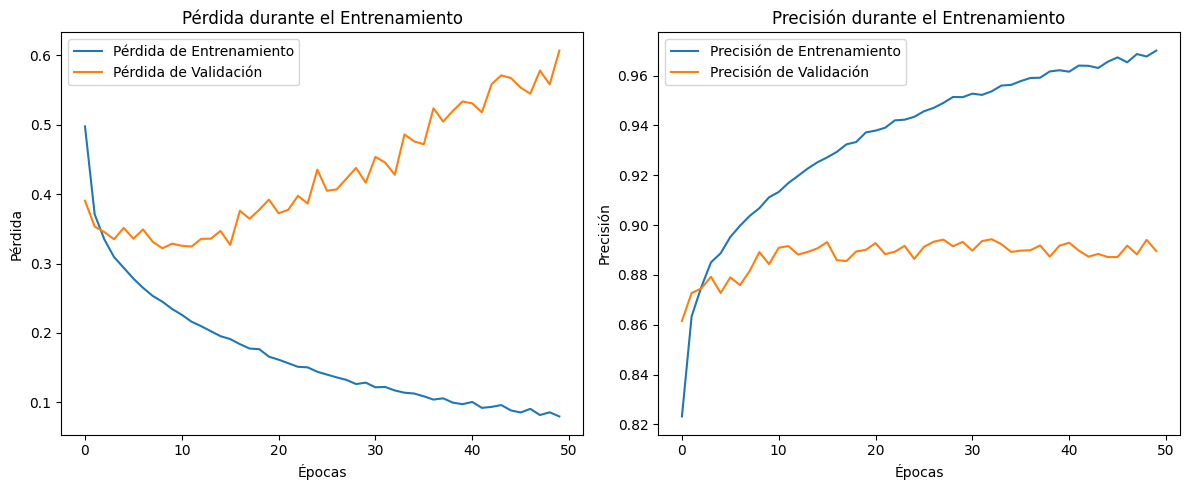

In [11]:
plot_training_history(history)

In [12]:

# Entrenar un modelo con L2
model_with_l2 = Sequential([
   tf.keras.layers.Flatten(input_shape=(28, 28)),
   tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
   tf.keras.layers.Dense(10, activation='softmax')
])

In [13]:
model_with_l2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', #adecuada para clasificación multiclase con etiquetas enteras
              metrics=['accuracy'])

In [14]:
history = model_with_l2.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7438 - loss: 1.1667 - val_accuracy: 0.8162 - val_loss: 0.6418
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8190 - loss: 0.6382 - val_accuracy: 0.8184 - val_loss: 0.6071
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8224 - loss: 0.6136 - val_accuracy: 0.7989 - val_loss: 0.6607
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8230 - loss: 0.6010 - val_accuracy: 0.8332 - val_loss: 0.5773
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8283 - loss: 0.5838 - val_accuracy: 0.8263 - val_loss: 0.5958
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8304 - loss: 0.5765 - val_accuracy: 0.8244 - val_loss: 0.5788
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8293 - loss: 0.5741 - val_accuracy: 0.8253 - val_loss: 0.6021
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8347 - loss: 0.5631 - 

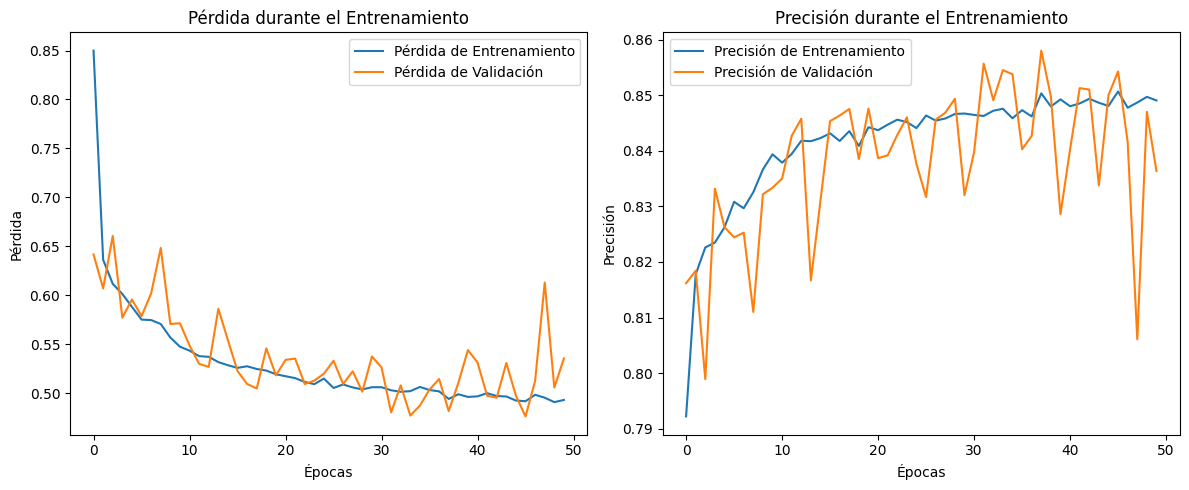

In [15]:
plot_training_history(history)

In [16]:
model_dropout = Sequential([
     tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64, activation='relu'),
    Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    Dropout(0.3),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [17]:
model_dropout.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', #adecuada para clasificación multiclase con etiquetas enteras
              metrics=['accuracy'])

In [18]:
history = model_dropout.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6529 - loss: 0.9710 - val_accuracy: 0.8381 - val_loss: 0.4515
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8152 - loss: 0.5191 - val_accuracy: 0.8528 - val_loss: 0.3992
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8276 - loss: 0.4789 - val_accuracy: 0.8511 - val_loss: 0.3988
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8368 - loss: 0.4487 - val_accuracy: 0.8700 - val_loss: 0.3817
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8471 - loss: 0.4294 - val_accuracy: 0.8624 - val_loss: 0.3750
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8512 - loss: 0.4237 - val_accuracy: 0.8633 - val_loss: 0.3712
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8540 - loss: 0.4070 - val_accuracy: 0.8710 - val_loss: 0.3589
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8568 - loss: 0.3977 - 

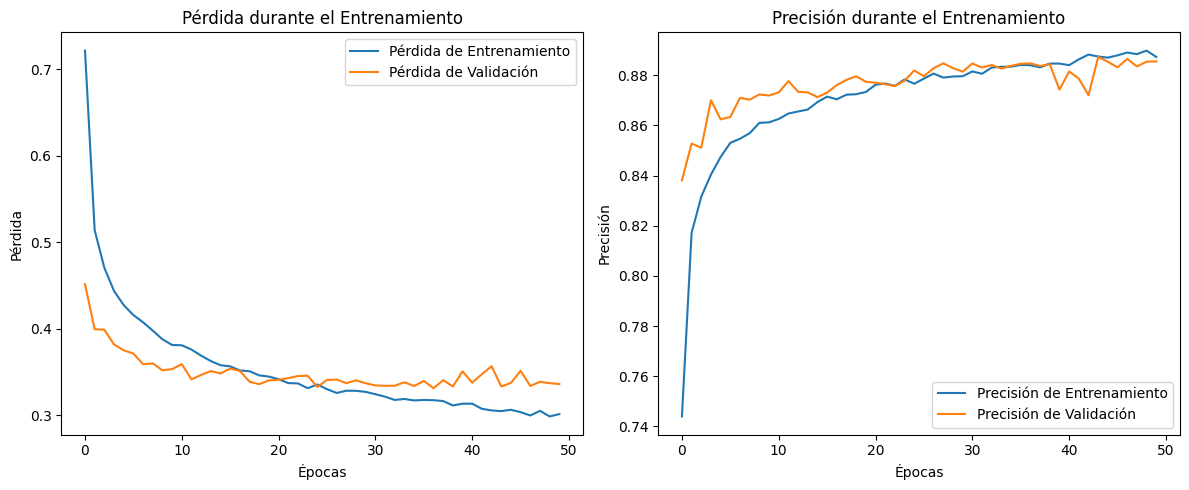

In [19]:
plot_training_history(history)

In [20]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10) # El entrenamiento se detendrá si no mejora en 10 epocas consecutivas


In [21]:
history = model_dropout.fit(X_train, y_train, epochs=80, batch_size=32, validation_split=0.2,callbacks=[early_stopping])

Epoch 1/80
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8900 - loss: 0.2983 - val_accuracy: 0.8839 - val_loss: 0.3366
Epoch 2/80
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8910 - loss: 0.2941 - val_accuracy: 0.8835 - val_loss: 0.3409
Epoch 3/80
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8918 - loss: 0.2946 - val_accuracy: 0.8826 - val_loss: 0.3453
Epoch 4/80
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8905 - loss: 0.2940 - val_accuracy: 0.8821 - val_loss: 0.3388
Epoch 5/80
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8922 - loss: 0.2941 - val_accuracy: 0.8840 - val_loss: 0.3446
Epoch 6/80
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8892 - loss: 0.2954 - val_accuracy: 0.8817 - val_loss: 0.3544
Epoch 7/80
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8892 - loss: 0.2994 - val_accuracy: 0.8823 - val_loss: 0.3545
Epoch 8/80
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8931 - loss: 0.2855 - 

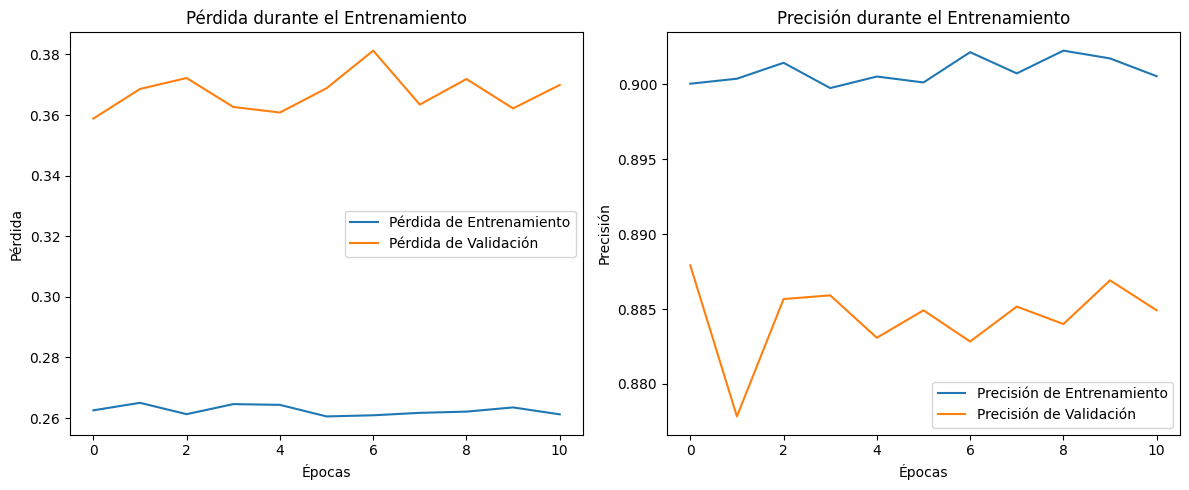

In [ ]:
plot_training_history(history)

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

# Configuración del Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Definir el modelo
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Aplana la imagen de entrada (28x28) a un vector de 784 elementos
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),  # Capa densa con L2 Regularización
    Dropout(0.3),  # Dropout al 30%
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(10, activation='softmax')  # 10 salidas para las 10 clases
    
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo con early stopping
history = model.fit(X_train, y_train, epochs=50, batch_size=32,
                    validation_split=0.2, callbacks=[early_stopping])

# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Precisión en el conjunto de prueba: {test_accuracy:.2f}")


Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6803 - loss: 1.1109 - val_accuracy: 0.8369 - val_loss: 0.6087
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8198 - loss: 0.6572 - val_accuracy: 0.8442 - val_loss: 0.5438
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8266 - loss: 0.6109 - val_accuracy: 0.8481 - val_loss: 0.5379
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8336 - loss: 0.5825 - val_accuracy: 0.8521 - val_loss: 0.5136
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8346 - loss: 0.5697 - val_accuracy: 0.8535 - val_loss: 0.5113
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8356 - loss: 0.5666 - val_accuracy: 0.8528 - val_loss: 0.5082
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8350 - loss: 0.5668 - val_accuracy: 0.8447 - val_loss: 0.5185
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8373 - loss: 0.5634 - 

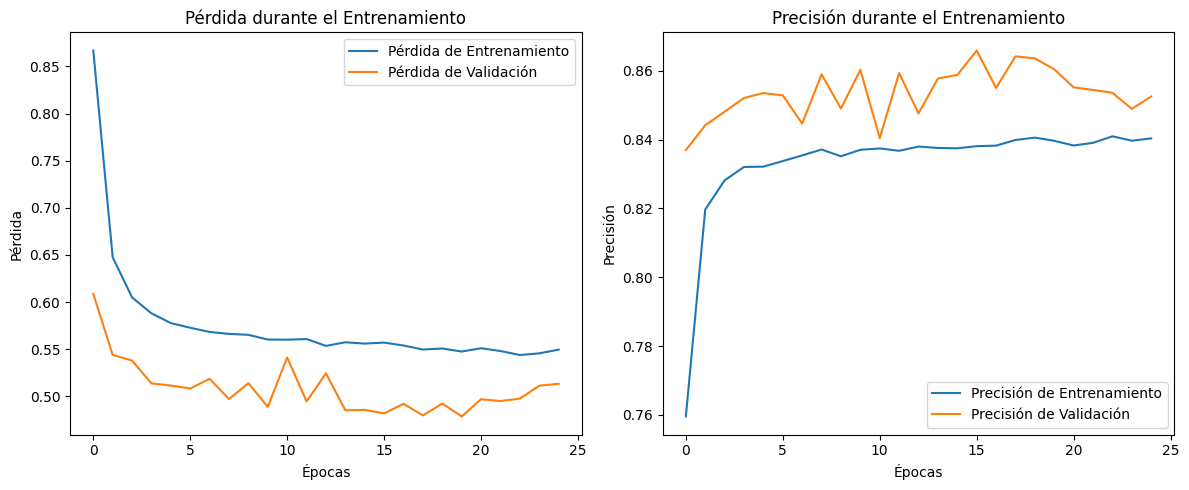

In [29]:
plot_training_history(history)